# Main Quest의 답은 맨 아래에 있습니다! 
## (위쪽은 Transformer 알고리즘을 분석하고 관련 블럭을 불러오기 위함 입니다!)

In [1]:
# import pandas as pd
# import tensorflow as tf
# from sklearn.model_selection import train_test_split
# from tensorflow.keras.preprocessing.text import Tokenizer
# from tensorflow.keras.preprocessing.sequence import pad_sequences
# import numpy as np
# import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
import os
import re
import numpy as np
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds

## 2-1. Transformer 전처리 과정

In [11]:
# 챗봇 데이터 로드
chatbot = pd.read_csv('~/aiffel/transformer_chatbot/data/ChatbotData .csv')

In [12]:
chatbot

,Q,A,label
0,12시 땡!,하루가 또 가네요.,0
1,1지망 학교 떨어졌어,위로해 드립니다.,0
2,3박4일 놀러가고 싶다,여행은 언제나 좋죠.,0
3,3박4일 정도 놀러가고 싶다,여행은 언제나 좋죠.,0
4,PPL 심하네,눈살이 찌푸려지죠.,0
...,...,...,...
11818,훔쳐보는 것도 눈치 보임.,티가 나니까 눈치가 보이는 거죠!,2
11819,훔쳐보는 것도 눈치 보임.,훔쳐보는 거 티나나봐요.,2
11820,흑기사 해주는 짝남.,설렜겠어요.,2
11821,힘든 연애 좋은 연애라는게 무슨 차이일까?,잘 헤어질 수 있는 사이 여부인 거 같아요.,2


In [9]:
# 전처리 함수
def preprocess_sentence(sentence, num=False):
    # 입력받은 sentence를 소문자로 변경하고 양쪽 공백을 제거
    sentence = sentence.strip()

    # 단어와 구두점(punctuation) 사이의 거리를 만듭니다.
    sentence = re.sub(r"([?.!,])", r" \1 ", sentence)
    sentence = re.sub(r'[" "]+', " ", sentence)

    # (가-힣, a-z, A-Z, ".", "?", "!", ",")를 제외한 모든 문자를 공백인 ' '로 대체합니다.
    if num == False: # 숫자제거
        sentence = re.sub(r'[^가-힣a-zA-Z.?!,]', ' ', sentence)
    else:
        sentence = re.sub(r'[^가-힣0-9a-zA-Z.?!,]', ' ', sentence)
    sentence = sentence.strip()
    return sentence

In [14]:
# 데이터 전처리:토큰화
questions = chatbot.Q.tolist()
answers = chatbot.A.tolist()

In [15]:
questions

['12시 땡!',
 '1지망 학교 떨어졌어',
 '3박4일 놀러가고 싶다',
 '3박4일 정도 놀러가고 싶다',
 'PPL 심하네',
 'SD카드 망가졌어',
 'SD카드 안돼',
 'SNS 맞팔 왜 안하지ㅠㅠ',
 'SNS 시간낭비인 거 아는데 매일 하는 중',
 'SNS 시간낭비인데 자꾸 보게됨',
 'SNS보면 나만 빼고 다 행복해보여',
 '가끔 궁금해',
 '가끔 뭐하는지 궁금해',
 '가끔은 혼자인게 좋다',
 '가난한 자의 설움',
 '가만 있어도 땀난다',
 '가상화폐 쫄딱 망함',
 '가스불 켜고 나갔어',
 '가스불 켜놓고 나온거 같아',
 '가스비 너무 많이 나왔다.',
 '가스비 비싼데 감기 걸리겠어',
 '가스비 장난 아님',
 '가장 확실한 건 뭘까?',
 '가족 여행 가기로 했어',
 '가족 여행 고고',
 '가족 여행 어디로 가지?',
 '가족 있어?',
 '가족관계 알려 줘',
 '가족끼리 여행간다.',
 '가족들 보고 싶어',
 '가족들이랑 서먹해',
 '가족들이랑 서먹해졌어',
 '가족들이랑 어디 가지?',
 '가족들이랑 여행 갈거야',
 '가족여행 가야지',
 '가족이 누구야?',
 '가족이랑 여행 가려고',
 '가족한테 스트레스 풀었어',
 '가출할까?',
 '가출해도 갈 데가 없어',
 '간만에 떨리니까 좋더라',
 '간만에 쇼핑 중',
 '간만에 휴식 중',
 '간식 뭐 먹을까',
 '간식 추천',
 '간장치킨 시켜야지',
 '간접흡연 싫어',
 '갈까 말까 고민 돼',
 '갈까 말까?',
 '감 말랭이 먹고 싶다.',
 '감 말랭이 먹어야지',
 '감기 같애',
 '감기 걸린 것 같아',
 '감기 기운이 있어',
 '감기 들 거 같애',
 '감기가 오려나',
 '감기약이 없어',
 '감기인거 같애',
 '감미로운 목소리 좋아',
 '감정이 쓰레기통처럼 엉망진창이야',
 '감정컨트롤을 못하겠어',
 '감정컨트롤이 안돼',
 '감히 나를 무시하는 애가 있어',
 '갑자기 나쁜 생각이 막 들더라',
 '갑자기 눈물 나',

In [16]:
import tensorflow_datasets as tfds

# 질문과 답변 데이터셋에 대해서 Vocabulary 생성
tokenizer = tfds.deprecated.text.SubwordTextEncoder.build_from_corpus(questions + answers, target_vocab_size=2**13)

In [17]:
# 시작 토큰과 종료 토큰에 고유한 정수를 부여합니다.
START_TOKEN, END_TOKEN = [tokenizer.vocab_size], [tokenizer.vocab_size + 1]

In [18]:
print('START_TOKEN의 번호 :' ,[tokenizer.vocab_size])
print('END_TOKEN의 번호 :' ,[tokenizer.vocab_size + 1])

START_TOKEN의 번호 : [8170]
END_TOKEN의 번호 : [8171]


In [19]:
# 시작 토큰과 종료 토큰을 고려하여 +2를 하여 단어장의 크기를 산정합니다.
VOCAB_SIZE = tokenizer.vocab_size + 2
print(VOCAB_SIZE)

8172


In [20]:
# 임의의 22번째 샘플에 대해서 정수 인코딩 작업을 수행.
# 각 토큰을 고유한 정수로 변환
print('정수 인코딩 후의 21번째 질문 샘플: {}'.format(tokenizer.encode(questions[21])))
print('정수 인코딩 후의 21번째 답변 샘플: {}'.format(tokenizer.encode(answers[21])))

정수 인코딩 후의 21번째 질문 샘플: [5759, 607, 2490, 4160]
정수 인코딩 후의 21번째 답변 샘플: [2353, 7510, 5, 6273, 94, 7960]


### 적절한 패딩 길이 구하기

In [21]:
import matplotlib.pyplot as plt

In [22]:
num_questions = [len(tokens) for tokens in questions]
num_questions = np.array(num_questions)


# 평균값, 최댓값, 표준편차
print(f"토큰 길이 평균: {np.mean(num_questions)}")
print(f"토큰 길이 최대: {np.max(num_questions)}")
print(f"토큰 길이 표준편차: {np.std(num_questions)}")

토큰 길이 평균: 12.879049310665652
토큰 길이 최대: 56
토큰 길이 표준편차: 6.167205838440642


In [23]:
num_answers = [len(tokens) for tokens in answers]
num_answers = np.array(num_answers)


# 평균값, 최댓값, 표준편차
print(f"토큰 길이 평균: {np.mean(num_answers)}")
print(f"토큰 길이 최대: {np.max(num_answers)}")
print(f"토큰 길이 표준편차: {np.std(num_answers)}")

토큰 길이 평균: 15.0151399813922
토큰 길이 최대: 76
토큰 길이 표준편차: 6.70155143772292


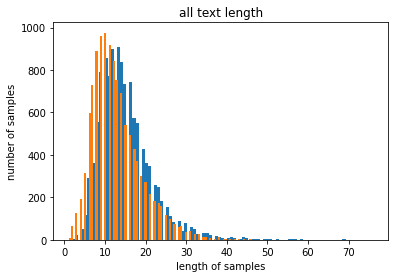

In [24]:
plt.title('all text length')
plt.hist(num_answers, bins=100)
plt.hist(num_questions, bins=100)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [25]:
select_length = 40

def below_threshold_len(max_len, nested_list):
    cnt = 0
    for s in nested_list:
        if(len(s) <= max_len):
            cnt = cnt + 1
        
    print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (cnt / len(nested_list))))

In [26]:
below_threshold_len(select_length, answers)

전체 샘플 중 길이가 40 이하인 샘플의 비율: 0.9924722997547154


In [27]:
below_threshold_len(select_length, questions)

전체 샘플 중 길이가 40 이하인 샘플의 비율: 0.9984775437706166


In [28]:
# 샘플의 최대 허용 길이 또는 패딩 후의 최종 길이
MAX_LENGTH = 40
print(MAX_LENGTH)

40


### 정수 인코딩, 최대 길이를 초과하는 샘플 제거, 패딩

In [29]:
def tokenize_and_filter(inputs, outputs):
    tokenized_inputs, tokenized_outputs = [], []

    for (sentence1, sentence2) in zip(inputs, outputs):
        # 정수 인코딩 과정에서 시작 토큰과 종료 토큰을 추가
        sentence1 = START_TOKEN + tokenizer.encode(sentence1) + END_TOKEN
        sentence2 = START_TOKEN + tokenizer.encode(sentence2) + END_TOKEN

        # 최대 길이 40 이하인 경우에만 데이터셋으로 허용
        if len(sentence1) <= MAX_LENGTH and len(sentence2) <= MAX_LENGTH:
            tokenized_inputs.append(sentence1)
            tokenized_outputs.append(sentence2)

    # 최대 길이 40으로 모든 데이터셋을 패딩
    tokenized_inputs = tf.keras.preprocessing.sequence.pad_sequences(
      tokenized_inputs, maxlen=MAX_LENGTH, padding='post')
    tokenized_outputs = tf.keras.preprocessing.sequence.pad_sequences(
      tokenized_outputs, maxlen=MAX_LENGTH, padding='post')

    return tokenized_inputs, tokenized_outputs

In [30]:
questions, answers = tokenize_and_filter(questions, answers)
print('단어장의 크기 :',(VOCAB_SIZE))
print('필터링 후의 질문 샘플 개수: {}'.format(len(questions)))
print('필터링 후의 답변 샘플 개수: {}'.format(len(answers)))

단어장의 크기 : 8172
필터링 후의 질문 샘플 개수: 11823
필터링 후의 답변 샘플 개수: 11823


### train data와 validation data로 나누어서 학습

In [31]:
import tensorflow as tf

# BATCH_SIZE와 BUFFER_SIZE 정의
BATCH_SIZE = 64
BUFFER_SIZE = 20000

# 질문과 답변 데이터를 tf.data.Dataset으로 만듭니다.
dataset = tf.data.Dataset.from_tensor_slices((
    {
        'inputs': questions,
        'dec_inputs': answers[:, :-1]
    },
    {
        'outputs': answers[:, 1:]
    },
))

# 전체 데이터셋 크기 계산
dataset_size = len(questions)

# 학습 데이터셋과 검증 데이터셋 크기 계산
train_size = int(0.8 * dataset_size)
val_size = dataset_size - train_size

# 데이터셋 캐싱, 셔플링, 배칭 및 prefetch 적용
dataset = dataset.cache()
dataset = dataset.shuffle(BUFFER_SIZE)

# 학습 데이터셋과 검증 데이터셋으로 분할
train_dataset = dataset.take(train_size).batch(BATCH_SIZE).prefetch(tf.data.experimental.AUTOTUNE)
val_dataset = dataset.skip(train_size).batch(BATCH_SIZE).prefetch(tf.data.experimental.AUTOTUNE)

## Transformer 모델 구성하기

추가적으로 모델 저장을 위해 `get_config()`와 `__init__`부분을 수정하였다

- 모델 선정 이유
    >- transformer는 자연어 처리 작업에서 좋은 성능을 발휘하는 것으로 알려져 있다.
    >- 특히 문장의 길이에 관계없이 문맥을 잘 이해하고 다룰 수 있는 능력이 강점이다. 

- Metrics 선정 이유
    >- 모델이 생성한 문장이 정확하게 의미를 전달하는지를 중요하게 여기기 때문에 accuracy 메트릭을 사용했다.
    >- 이 메트릭은 모델이 단어 수준에서 얼마나 정확하게 예측하는지를 측정한다. 
    >- 이 외에도 BLEU나 ROUGE 등의 자동 평가 지표를 사용하여 모델의 출력을 사람이 직접 평가하는 경우와 비교할 수도 있다.

- Loss 선정 이유
    >- 우리가 다루는 과제는 문장 생성 문제이며, 희소한 출력 공간에서 정확한 단어를 예측하는 것이 중요하다. 
    >- 이를 위해 sparse categorical crossentropy 손실 함수를 선택했다. 
    >- 이 함수는 다중 클래스 분류 문제에서 주로 사용되며, 우리의 출력이 정수 형태의 토큰 ID로 표현되기 때문에 적합하다. 
    >- 또한, 패딩된 부분을 무시하기 위한 mask를 적용하여 모델이 패딩 토큰을 무시하도록 했다.


In [32]:
class PositionalEncoding(tf.keras.layers.Layer):
    def __init__(self, position, d_model, **kwargs):
        super(PositionalEncoding, self).__init__(**kwargs)
        self.position = position
        self.d_model = d_model
        self.pos_encoding = self.positional_encoding(position, d_model)
    
    def get_angles(self, position, i, d_model):
        angles = 1 / tf.pow(10000, (2 * (i // 2)) / tf.cast(d_model, tf.float32))
        return position * angles

    def positional_encoding(self, position, d_model):
        angle_rads = self.get_angles(
            position=tf.range(position, dtype=tf.float32)[:, tf.newaxis],
            i=tf.range(d_model, dtype=tf.float32)[tf.newaxis, :],
            d_model=d_model)

        sines = tf.math.sin(angle_rads[:, 0::2])
        cosines = tf.math.cos(angle_rads[:, 1::2])

        pos_encoding = tf.stack([sines, cosines], axis=0)
        pos_encoding = tf.transpose(pos_encoding, [1, 2, 0])
        pos_encoding = tf.reshape(pos_encoding, [position, d_model])

        pos_encoding = pos_encoding[tf.newaxis, ...]
        return tf.cast(pos_encoding, tf.float32)

    def call(self, inputs):
        return inputs + self.pos_encoding[:, :tf.shape(inputs)[1], :]

    def get_config(self):
        config = super(PositionalEncoding, self).get_config()
        config.update({
            'position': self.position,
            'd_model': self.d_model
        })
        return config

In [33]:
# 스케일드 닷 프로덕트 어텐션 함수
def scaled_dot_product_attention(query, key, value, mask):
    # 어텐션 가중치는 Q와 K의 닷 프로덕트
    matmul_qk = tf.matmul(query, key, transpose_b=True)

    # 가중치를 정규화
    depth = tf.cast(tf.shape(key)[-1], tf.float32)
    logits = matmul_qk / tf.math.sqrt(depth)

    # 패딩에 마스크 추가
    if mask is not None:
        logits += (mask * -1e9)

    # softmax적용
    attention_weights = tf.nn.softmax(logits, axis=-1)

    # 최종 어텐션은 가중치와 V의 닷 프로덕트
    output = tf.matmul(attention_weights, value)
    return output

In [34]:
class MultiHeadAttention(tf.keras.layers.Layer):

    def __init__(self, d_model, num_heads, **kwargs):
        super(MultiHeadAttention, self).__init__(**kwargs)
        self.num_heads = num_heads
        self.d_model = d_model

        assert d_model % self.num_heads == 0

        self.depth = d_model // self.num_heads

        self.query_dense = tf.keras.layers.Dense(units=d_model)
        self.key_dense = tf.keras.layers.Dense(units=d_model)
        self.value_dense = tf.keras.layers.Dense(units=d_model)

        self.dense = tf.keras.layers.Dense(units=d_model)

    def split_heads(self, inputs, batch_size):
        inputs = tf.reshape(
            inputs, shape=(batch_size, -1, self.num_heads, self.depth))
        return tf.transpose(inputs, perm=[0, 2, 1, 3])

    def call(self, inputs):
        query, key, value, mask = inputs['query'], inputs['key'], inputs['value'], inputs['mask']
        batch_size = tf.shape(query)[0]

        # Q, K, V에 각각 Dense를 적용합니다
        query = self.query_dense(query)
        key = self.key_dense(key)
        value = self.value_dense(value)

        # 병렬 연산을 위한 머리를 여러 개 만듭니다
        query = self.split_heads(query, batch_size)
        key = self.split_heads(key, batch_size)
        value = self.split_heads(value, batch_size)

        # 스케일드 닷 프로덕트 어텐션 함수
        scaled_attention = scaled_dot_product_attention(query, key, value, mask)

        scaled_attention = tf.transpose(scaled_attention, perm=[0, 2, 1, 3])

        # 어텐션 연산 후에 각 결과를 다시 연결(concatenate)합니다
        concat_attention = tf.reshape(scaled_attention,
                                      (batch_size, -1, self.d_model))

        # 최종 결과에도 Dense를 한 번 더 적용합니다
        outputs = self.dense(concat_attention)

        return outputs
    
    def get_config(self):
        config = super(MultiHeadAttention, self).get_config()
        config.update({
            'd_model': self.d_model,
            'num_heads': self.num_heads,
        })
        return config

In [36]:
def create_padding_mask(x):
    mask = tf.cast(tf.math.equal(x, 0), tf.float32)
    # (batch_size, 1, 1, sequence length)
    return mask[:, tf.newaxis, tf.newaxis, :]

def create_look_ahead_mask(x):
    seq_len = tf.shape(x)[1]
    look_ahead_mask = 1 - tf.linalg.band_part(tf.ones((seq_len, seq_len)), -1, 0)
    padding_mask = create_padding_mask(x)
    return tf.maximum(look_ahead_mask, padding_mask)



In [37]:
# 인코더 하나의 레이어를 함수로 구현.
# 이 하나의 레이어 안에는 두 개의 서브 레이어가 존재합니다.
def encoder_layer(units, d_model, num_heads, dropout, name="encoder_layer"):
    inputs = tf.keras.Input(shape=(None, d_model), name="inputs")

    # 패딩 마스크 사용
    padding_mask = tf.keras.Input(shape=(1, 1, None), name="padding_mask")

    # 첫 번째 서브 레이어 : 멀티 헤드 어텐션 수행 (셀프 어텐션)
    attention = MultiHeadAttention(
      d_model, num_heads, name="attention")({
          'query': inputs,
          'key': inputs,
          'value': inputs,
          'mask': padding_mask
      })

    # 어텐션의 결과는 Dropout과 Layer Normalization이라는 훈련을 돕는 테크닉을 수행
    attention = tf.keras.layers.Dropout(rate=dropout)(attention)
    attention = tf.keras.layers.LayerNormalization(
      epsilon=1e-6)(inputs + attention)

    # 두 번째 서브 레이어 : 2개의 완전연결층
    outputs = tf.keras.layers.Dense(units=units, activation='relu')(attention)
    outputs = tf.keras.layers.Dense(units=d_model)(outputs)

    # 완전연결층의 결과는 Dropout과 LayerNormalization이라는 훈련을 돕는 테크닉을 수행
    outputs = tf.keras.layers.Dropout(rate=dropout)(outputs)
    outputs = tf.keras.layers.LayerNormalization(
      epsilon=1e-6)(attention + outputs)

    return tf.keras.Model(
        inputs=[inputs, padding_mask], outputs=outputs, name=name)

def encoder(vocab_size, num_layers, units, d_model, num_heads, dropout, name="encoder"):
    inputs = tf.keras.Input(shape=(None,), name="inputs")

    # 패딩 마스크 사용
    padding_mask = tf.keras.Input(shape=(1, 1, None), name="padding_mask")

    # 임베딩 레이어
    embeddings = tf.keras.layers.Embedding(vocab_size, d_model)(inputs)
    embeddings *= tf.math.sqrt(tf.cast(d_model, tf.float32))

    # 포지셔널 인코딩
    embeddings = PositionalEncoding(vocab_size, d_model)(embeddings)

    outputs = tf.keras.layers.Dropout(rate=dropout)(embeddings)

    # num_layers만큼 쌓아올린 인코더의 층.
    for i in range(num_layers):
        outputs = encoder_layer(
            units=units,
            d_model=d_model,
            num_heads=num_heads,
            dropout=dropout,
            name="encoder_layer_{}".format(i),)([outputs, padding_mask])

    return tf.keras.Model(
      inputs=[inputs, padding_mask], outputs=outputs, name=name)

In [38]:
# 디코더 하나의 레이어를 함수로 구현.
# 이 하나의 레이어 안에는 세 개의 서브 레이어가 존재합니다.
def decoder_layer(units, d_model, num_heads, dropout, name="decoder_layer"):
    inputs = tf.keras.Input(shape=(None, d_model), name="inputs")
    enc_outputs = tf.keras.Input(shape=(None, d_model), name="encoder_outputs")
    look_ahead_mask = tf.keras.Input(
      shape=(1, None, None), name="look_ahead_mask")
    padding_mask = tf.keras.Input(shape=(1, 1, None), name='padding_mask')
    
    #################################################
    # 첫 번째 서브 레이어 : 멀티 헤드 어텐션 수행 (셀프 어텐션) #
    ################################################
    attention1 = MultiHeadAttention(
      d_model, num_heads, name="attention_1")(inputs={
          'query': inputs,
          'key': inputs,
          'value': inputs,
          'mask': look_ahead_mask
      })

    # 멀티 헤드 어텐션의 결과는 LayerNormalization이라는 훈련을 돕는 테크닉을 수행
    attention1 = tf.keras.layers.LayerNormalization(
      epsilon=1e-6)(attention1 + inputs)

    ##############################################################
    # 두 번째 서브 레이어 : 마스크드 멀티 헤드 어텐션 수행 (인코더-디코더 어텐션) #
    ##############################################################
    attention2 = MultiHeadAttention(
      d_model, num_heads, name="attention_2")(inputs={
          'query': attention1,
          'key': enc_outputs,
          'value': enc_outputs,
          'mask': padding_mask
      })

    # 마스크드 멀티 헤드 어텐션의 결과는
    # Dropout과 LayerNormalization이라는 훈련을 돕는 테크닉을 수행
    attention2 = tf.keras.layers.Dropout(rate=dropout)(attention2)
    attention2 = tf.keras.layers.LayerNormalization(
      epsilon=1e-6)(attention2 + attention1)

    ##################################
    # 세 번째 서브 레이어 : 2개의 완전연결층 #
    #################################
    outputs = tf.keras.layers.Dense(units=units, activation='relu')(attention2)
    outputs = tf.keras.layers.Dense(units=d_model)(outputs)

    # 완전연결층의 결과는 Dropout과 LayerNormalization 수행
    outputs = tf.keras.layers.Dropout(rate=dropout)(outputs)
    outputs = tf.keras.layers.LayerNormalization(
      epsilon=1e-6)(outputs + attention2)

    return tf.keras.Model(
      inputs=[inputs, enc_outputs, look_ahead_mask, padding_mask],
      outputs=outputs,
      name=name)

def decoder(vocab_size,
            num_layers,
            units,
            d_model,
            num_heads,
            dropout,
            name='decoder'):
    inputs = tf.keras.Input(shape=(None,), name='inputs')
    enc_outputs = tf.keras.Input(shape=(None, d_model), name='encoder_outputs')
    look_ahead_mask = tf.keras.Input(
      shape=(1, None, None), name='look_ahead_mask')

    # 패딩 마스크
    padding_mask = tf.keras.Input(shape=(1, 1, None), name='padding_mask')

    # 임베딩 레이어
    embeddings = tf.keras.layers.Embedding(vocab_size, d_model)(inputs)
    embeddings *= tf.math.sqrt(tf.cast(d_model, tf.float32))

    # 포지셔널 인코딩
    embeddings = PositionalEncoding(vocab_size, d_model)(embeddings)

    # Dropout이라는 훈련을 돕는 테크닉을 수행
    outputs = tf.keras.layers.Dropout(rate=dropout)(embeddings)

    for i in range(num_layers):
        outputs = decoder_layer(
            units=units,
            d_model=d_model,
            num_heads=num_heads,
            dropout=dropout,
            name='decoder_layer_{}'.format(i),
        )(inputs=[outputs, enc_outputs, look_ahead_mask, padding_mask])

    return tf.keras.Model(
      inputs=[inputs, enc_outputs, look_ahead_mask, padding_mask],
      outputs=outputs,
      name=name)

In [39]:
def transformer(vocab_size,
                num_layers,
                units,
                d_model,
                num_heads,
                dropout,
                name="transformer"):
    inputs = tf.keras.Input(shape=(None,), name="inputs")
    dec_inputs = tf.keras.Input(shape=(None,), name="dec_inputs")

    # 인코더에서 패딩을 위한 마스크
    enc_padding_mask = tf.keras.layers.Lambda(
      create_padding_mask, output_shape=(1, 1, None),
      name='enc_padding_mask')(inputs)

    # 디코더에서 미래의 토큰을 마스크 하기 위해서 사용합니다.
    # 내부적으로 패딩 마스크도 포함되어져 있습니다.
    look_ahead_mask = tf.keras.layers.Lambda(
      create_look_ahead_mask,
      output_shape=(1, None, None),
      name='look_ahead_mask')(dec_inputs)

    # 두 번째 어텐션 블록에서 인코더의 벡터들을 마스킹
    # 디코더에서 패딩을 위한 마스크
    dec_padding_mask = tf.keras.layers.Lambda(
      create_padding_mask, output_shape=(1, 1, None),
      name='dec_padding_mask')(inputs)

    # 인코더
    enc_outputs = encoder(
      vocab_size=vocab_size,
      num_layers=num_layers,
      units=units,
      d_model=d_model,
      num_heads=num_heads,
      dropout=dropout,
    )(inputs=[inputs, enc_padding_mask])

    # 디코더
    dec_outputs = decoder(
      vocab_size=vocab_size,
      num_layers=num_layers,
      units=units,
      d_model=d_model,
      num_heads=num_heads,
      dropout=dropout,
    )(inputs=[dec_inputs, enc_outputs, look_ahead_mask, dec_padding_mask])

    # 완전연결층
    outputs = tf.keras.layers.Dense(units=vocab_size, name="outputs")(dec_outputs)

    return tf.keras.Model(inputs=[inputs, dec_inputs], outputs=outputs, name=name)

In [40]:

tf.keras.backend.clear_session()

# 하이퍼파라미터
NUM_LAYERS = 2 # 인코더와 디코더의 층의 개수
D_MODEL = 256 # 인코더와 디코더 내부의 입, 출력의 고정 차원
NUM_HEADS = 8 # 멀티 헤드 어텐션에서의 헤드 수 
UNITS = 512 # 피드 포워드 신경망의 은닉층의 크기
DROPOUT = 0.1 # 드롭아웃의 비율

model = transformer(
    vocab_size=VOCAB_SIZE,
    num_layers=NUM_LAYERS,
    units=UNITS,
    d_model=D_MODEL,
    num_heads=NUM_HEADS,
    dropout=DROPOUT)

model.summary()

Model: "transformer"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
inputs (InputLayer)             [(None, None)]       0                                            
__________________________________________________________________________________________________
dec_inputs (InputLayer)         [(None, None)]       0                                            
__________________________________________________________________________________________________
enc_padding_mask (Lambda)       (None, 1, 1, None)   0           inputs[0][0]                     
__________________________________________________________________________________________________
encoder (Functional)            (None, None, 256)    3146240     inputs[0][0]                     
                                                                 enc_padding_mask[0][0] 

In [41]:
# 손실 함수
def loss_function(y_true, y_pred):
    y_true = tf.reshape(y_true, shape=(-1, MAX_LENGTH - 1))

    loss = tf.keras.losses.SparseCategoricalCrossentropy(
      from_logits=True, reduction='none')(y_true, y_pred)

    mask = tf.cast(tf.not_equal(y_true, 0), tf.float32)
    loss = tf.multiply(loss, mask)

    return tf.reduce_mean(loss)

### 커스텀 된 학습률(Learning rate)

$$ lrate = d^{-0.5}_{model} \cdot min(step\_num^{-0.5}, step\_num \cdot warmup\_steps^{-1.5}) $$

In [42]:
class CustomSchedule(tf.keras.optimizers.schedules.LearningRateSchedule):

    def __init__(self, d_model, warmup_steps=4000):
        super(CustomSchedule, self).__init__()

        self.d_model = d_model
        self.d_model = tf.cast(self.d_model, tf.float32)

        self.warmup_steps = warmup_steps

    def __call__(self, step):
        arg1 = tf.math.rsqrt(step)
        arg2 = step * (self.warmup_steps**-1.5)

        return tf.math.rsqrt(self.d_model) * tf.math.minimum(arg1, arg2)
    
    def get_config(self):
        return {
            'd_model': int(self.d_model.numpy()),
            'warmup_steps': self.warmup_steps,
        }

In [43]:

# CustomSchedule 클래스 정의
class CustomSchedule(tf.keras.optimizers.schedules.LearningRateSchedule):
    def __init__(self, d_model, warmup_steps=4000):
        super(CustomSchedule, self).__init__()
        
        self.d_model = tf.cast(d_model, tf.float32)
        self.warmup_steps = warmup_steps

    def __call__(self, step):
        step = tf.cast(step, tf.float32)  # Ensure step is a float tensor
        arg1 = tf.math.rsqrt(step)
        arg2 = step * (self.warmup_steps**-1.5)
        
        return tf.math.rsqrt(self.d_model) * tf.math.minimum(arg1, arg2)

In [44]:
# 모델 컴파일
learning_rate = CustomSchedule(D_MODEL)

optimizer = tf.keras.optimizers.Adam(
    learning_rate, beta_1=0.9, beta_2=0.98, epsilon=1e-9)

def accuracy(y_true, y_pred):
    y_true = tf.reshape(y_true, shape=(-1, MAX_LENGTH - 1))
    return tf.keras.metrics.sparse_categorical_accuracy(y_true, y_pred)

model.compile(optimizer=optimizer, loss=loss_function, metrics=[accuracy])

In [ ]:
# 체크포인트 콜백 정의
checkpoint_path = "./checkpoints/cp-{epoch:04d}.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# 모델 체크포인트 콜백 생성
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path,
    save_weights_only=True,
    save_best_only=True,
    monitor='val_loss',
    verbose=1
)

# 모델 학습
EPOCHS = 30
history = model.fit(
    train_dataset,
    epochs=EPOCHS,
    validation_data=val_dataset,
    callbacks=[checkpoint_callback],
    verbose=1
)

Epoch 1/50
148/148 [==============================] - 33s 69ms/step - loss: 1.4788 - accuracy: 0.0234 - val_loss: 1.3484 - val_accuracy: 0.0481

Epoch 00001: val_loss improved from inf to 1.34837, saving model to ./checkpoints/cp-0001.ckpt
Epoch 2/50
148/148 [==============================] - 9s 61ms/step - loss: 1.2575 - accuracy: 0.0482 - val_loss: 1.1320 - val_accuracy: 0.0496

Epoch 00002: val_loss improved from 1.34837 to 1.13197, saving model to ./checkpoints/cp-0002.ckpt
Epoch 3/50
148/148 [==============================] - 9s 61ms/step - loss: 1.0668 - accuracy: 0.0498 - val_loss: 0.9914 - val_accuracy: 0.0502

Epoch 00003: val_loss improved from 1.13197 to 0.99136, saving model to ./checkpoints/cp-0003.ckpt
Epoch 4/50
148/148 [==============================] - 9s 62ms/step - loss: 0.9742 - accuracy: 0.0516 - val_loss: 0.9096 - val_accuracy: 0.0534

Epoch 00004: val_loss improved from 0.99136 to 0.90961, saving model to ./checkpoints/cp-0004.ckpt
Epoch 5/50
148/148 [===========

### Loss와 Accuracy 시각화

In [48]:
history_dict = history.history
print(history_dict.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


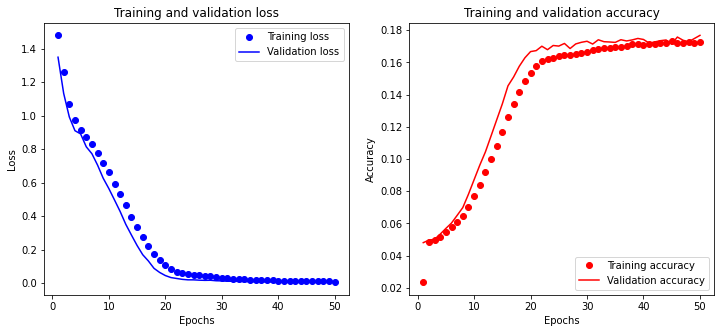

In [49]:
import matplotlib.pyplot as plt

# history에서 손실과 정확도, 검증 손실과 검증 정확도를 추출합니다.
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

fig = plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, acc, 'ro', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [50]:
def decoder_inference(sentence, model, num):
    sentence = preprocess_sentence(sentence, num)

    # 입력된 문장을 정수 인코딩 후, 시작 토큰과 종료 토큰을 앞뒤로 추가.
    # ex) Where have you been? → [[8331   86   30    5 1059    7 8332]]
    sentence = tf.expand_dims(
      START_TOKEN + tokenizer.encode(sentence) + END_TOKEN, axis=0)

    # 디코더의 현재까지의 예측한 출력 시퀀스가 지속적으로 저장되는 변수.
    # 처음에는 예측한 내용이 없음으로 시작 토큰만 별도 저장. ex) 8331
    output_sequence = tf.expand_dims(START_TOKEN, 0)

    # 디코더의 인퍼런스 단계
    for i in range(MAX_LENGTH):
        # 디코더는 최대 MAX_LENGTH의 길이만큼 다음 단어 예측을 반복합니다.
        predictions = model(inputs=[sentence, output_sequence], training=False)
        predictions = predictions[:, -1:, :]

        # 현재 예측한 단어의 정수
        predicted_id = tf.cast(tf.argmax(predictions, axis=-1), tf.int32)

        # 만약 현재 예측한 단어가 종료 토큰이라면 for문을 종료
        if tf.equal(predicted_id, END_TOKEN[0]):
            break

        # 예측한 단어들은 지속적으로 output_sequence에 추가됩니다.
        # 이 output_sequence는 다시 디코더의 입력이 됩니다.
        output_sequence = tf.concat([output_sequence, predicted_id], axis=-1)

    return tf.squeeze(output_sequence, axis=0)

In [51]:
def sentence_generation(sentence, model, num=False):
    # 입력 문장에 대해서 디코더를 동작 시켜 예측된 정수 시퀀스를 리턴받습니다.
    prediction = decoder_inference(sentence, model, num)

    # 정수 시퀀스를 다시 텍스트 시퀀스로 변환합니다.
    predicted_sentence = tokenizer.decode(
      [i for i in prediction if i < tokenizer.vocab_size])

    print('입력 : {}'.format(sentence))
    print('출력 : {}'.format(predicted_sentence))

    return predicted_sentence

In [4]:

# tokenizer = Tokenizer()
# tokenizer.fit_on_texts(questions + answers)
# total_words = len(tokenizer.word_index) + 1

# input_sequences = []
# for line in questions + answers:
#     token_list = tokenizer.texts_to_sequences([line])[0]
#     for i in range(1, len(token_list)):
#         n_gram_sequence = token_list[:i+1]
#         input_sequences.append(n_gram_sequence)

In [5]:
# # 패딩과 입력, 출력 분리
# max_sequence_len = max([len(x) for x in input_sequences])
# input_sequences = pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre')

# X, y = input_sequences[:,:-1], input_sequences[:,-1]
# y = tf.keras.utils.to_categorical(y, num_classes=total_words)

In [6]:
# # 학습 및 검증 데이터 분리
# X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

### 3. GPT-1 modeling (시도)

In [7]:
# from tensorflow.keras.layers import Embedding, Dense, Input, GlobalAveragePooling1D, MultiHeadAttention, LayerNormalization, Dropout
# from tensorflow.keras.models import Model
# # GPT-1은 Transformer의 Decoder 블록만을 사용한다. 
# # 따라서 Encoder 블록을 제거하고, Decoder만으로 모델을 구성해야 한다.
# # GPT-1은 학습 중 마스크된 멀티 헤드 어텐션을 사용한다. 따라서 입력 시퀀스의 다음 단어를 예측하는 방식으로 입력 블럭 역시 수정되어야 한다.
# # GPT-1의 Decoder 블록을 구성하고, 이를 사용해 모델을 학습하겠다.
# def gpt_model(vocab_size, max_len, num_layers, units, d_model, num_heads, dropout):
#     inputs = Input(shape=(max_len,))
#     # 임베딩 레이어
#     embedding_layer = Embedding(vocab_size, d_model)
#     x = embedding_layer(inputs)
#     # Transformer의 Decoder 부분만 사용하여 GPT-1 model을 구성한다.
#     for _ in range(num_layers):
#         # 멀티 헤드 어텐션
#         attn_output = MultiHeadAttention(num_heads=num_heads, key_dim=d_model)(x, x, x)
#         attn_output = Dropout(dropout)(attn_output)
#         out1 = LayerNormalization(epsilon=1e-6)(x + attn_output)
#         # 포지셔널 피드포워드 네트워크
#         ffn_output = Dense(units, activation='relu')(out1)
#         ffn_output = Dense(d_model)(ffn_output)
#         ffn_output = Dropout(dropout)(ffn_output)
#         x = LayerNormalization(epsilon=1e-6)(out1 + ffn_output)
#     # 평균 풀링 후 출력 레이어
#     x = GlobalAveragePooling1D()(x)
#     outputs = Dense(vocab_size, activation='softmax')(x)
    
#     return Model(inputs, outputs)


In [8]:
# # 하이퍼파라미터 설정
# num_layers = 2
# d_model = 128
# num_heads = 4
# units = 256
# dropout = 0.1

# # GPT-1 모델 생성
# model = gpt_model(total_words, max_sequence_len-1, num_layers, units, d_model, num_heads, dropout)
# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 27)]         0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 27, 128)      3107584     input_1[0][0]                    
__________________________________________________________________________________________________
multi_head_attention (MultiHead (None, 27, 128)      263808      embedding[0][0]                  
                                                                 embedding[0][0]                  
                                                                 embedding[0][0]                  
______________________________________________________________________________________________

In [ ]:
# # 모델 학습
# history = model.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val))

Epoch 1/20


In [ ]:
# # 학습 결과 시각화
# plt.plot(history.history['accuracy'], label='accuracy')
# plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
# plt.xlabel('Epoch')
# plt.ylabel('Accuracy')
# plt.ylim([0, 1])
# plt.legend(loc='lower right')

# test_loss, test_acc = model.evaluate(X_val,  y_val, verbose=2)
# print(f'Test accuracy: {test_acc}')


In [ ]:
# # 텍스트 생성 함수
# def generate_text(seed_text, next_words, model, max_sequence_len):
#     for _ in range(next_words):
#         token_list = tokenizer.texts_to_sequences([seed_text])[0]
#         token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
#         predicted = model.predict(token_list, verbose=0)
#         predicted_word = tokenizer.index_word[np.argmax(predicted)]
#         seed_text += " " + predicted_word
#     return seed_text

In [ ]:
# # 예시 텍스트 생성
# seed_text = "안녕하세요"
# next_words = 10
# generated_text = generate_text(seed_text, next_words, model, max_sequence_len)
# print(generated_text)

## Q1. GPT model 생성 ( 본 Quest 정답 )


- Tranformer와 비교해 변경이 필요한 부분 (입력 블럭)
    >- GPT-1의 입력 블록을 단일 시퀸스 입력으로 처리하도록 변경해야 한다(주로 텍스트 생성을 위한 언어 모델이므로).
    >- 기존의 Encoder-Decoder 구조에서 Encoder를 제거하고 Decoder만 사용해야 한다.
    >- 따라서 기존의 inputs와 dec_inputs를 단일 inputs로 변경하였고, enc_padding_mask와 dec_padding_mask를 제거하고, 대신 look_ahead_mask를 사용하였다.

- Tranformer와 비교해 변경이 필요한 부분 (모델 아키텍처)
    >- 학습 중 마스크된 멀티 헤드 어텐션을 사용한다
    >- 입력을 받아 단일 시퀀스 출력으로 변환해야 한다.
    >- 기존의 encoder 블록을 제거하고, decoder 블록만 사용하도록 변경한 뒤 inputs를 그대로 decoder 블록의 입력으로 사용하였다.

- Tranformer와 비교해 변경이 필요한 부분 (출력 블럭)
    >- 출력 블록은 다음 토큰을 예측하는 형태로 변경해야 한다.
    >- decoder의 출력에 대해 다음 토큰을 예측하도록 Dense 레이어를 적용하였다.

## Q2. GPT modeling process (include preprocessing)

In [2]:
import os
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import re
import tensorflow_datasets as tfds

In [3]:
# 데이터 로드 및 전처리
# 데이터 로드 및 전처리

data = pd.read_csv('~/aiffel/transformer_chatbot/data/ChatbotData .csv')
data.head()

,Q,A,label
0,12시 땡!,하루가 또 가네요.,0
1,1지망 학교 떨어졌어,위로해 드립니다.,0
2,3박4일 놀러가고 싶다,여행은 언제나 좋죠.,0
3,3박4일 정도 놀러가고 싶다,여행은 언제나 좋죠.,0
4,PPL 심하네,눈살이 찌푸려지죠.,0


In [4]:
# 전처리 함수
def preprocess_sentence(sentence, num=True):
    sentence = sentence.strip()
    sentence = re.sub(r"([?.!,])", r" \1 ", sentence)
    sentence = re.sub(r'[" "]+', " ", sentence)
    if num == False:
        sentence = re.sub(r'[^가-힣a-zA-Z.?!,]', ' ', sentence)
    else:
        sentence = re.sub(r'[^가-힣0-9a-zA-Z.?!,]', ' ', sentence)
    sentence = sentence.strip()
    return sentence

In [5]:
# 입출력을 합친 모든 문장을 가진 리스트를 만듦
all_sentences = pd.concat([data["Q"], data["A"]]).tolist()

In [6]:
def preprocess_sentences(sentences):
    return [preprocess_sentence(sentence) for sentence in sentences]

In [7]:
dataset = preprocess_sentences(all_sentences)

In [8]:
# 질문과 답변 데이터셋에 대해서 Vocabulary 생성
tokenizer = tfds.deprecated.text.SubwordTextEncoder.build_from_corpus(dataset, target_vocab_size=2**13)

# 시작 토큰과 종료 토큰에 고유한 정수를 부여합니다.
START_TOKEN, END_TOKEN = [tokenizer.vocab_size], [tokenizer.vocab_size + 1]

# 시작 토큰과 종료 토큰을 고려하여 +2를 하여 단어장의 크기를 산정합니다.
VOCAB_SIZE = tokenizer.vocab_size + 2
print(VOCAB_SIZE)

MAX_LENGTH = 40

8166


In [9]:
# 정수 인코딩, 최대 길이를 초과하는 샘플 제거, 패딩
def tokenize_and_filter(sentences):
    tokenized_outputs = []

    for sentence in sentences:
        sentence = START_TOKEN + tokenizer.encode(sentence) + END_TOKEN
        if len(sentence) <= MAX_LENGTH:
            tokenized_outputs.append(sentence)

    tokenized_outputs = tf.keras.preprocessing.sequence.pad_sequences(
      tokenized_outputs, maxlen=MAX_LENGTH, padding='post')

    return tokenized_outputs

In [10]:
dataset = tokenize_and_filter(dataset)

In [11]:
def create_padding_mask(x):
    mask = tf.cast(tf.math.equal(x, 0), tf.float32)
    # (batch_size, 1, 1, sequence length)
    return mask[:, tf.newaxis, tf.newaxis, :]

def create_look_ahead_mask(x):
    seq_len = tf.shape(x)[1]
    look_ahead_mask = 1 - tf.linalg.band_part(tf.ones((seq_len, seq_len)), -1, 0)
    padding_mask = create_padding_mask(x)
    return tf.maximum(look_ahead_mask, padding_mask)

In [12]:
# look-ahead 마스크 생성
look_ahead_mask = create_look_ahead_mask(dataset[:, :-1])

In [13]:
data = dataset

In [14]:
BATCH_SIZE = 64
BUFFER_SIZE = 20000

In [15]:
# 질문과 답변 데이터를 tf.data.Dataset으로 만듭니다.
dataset = tf.data.Dataset.from_tensor_slices((
    {
        'inputs': data[:, :-1],
        'look_ahead_mask': look_ahead_mask,
    },
    {
        'outputs': data[:, 1:]
    },
))


In [16]:
dataset

<TensorSliceDataset shapes: ({inputs: (39,), look_ahead_mask: (1, 39, 39)}, {outputs: (39,)}), types: ({inputs: tf.int32, look_ahead_mask: tf.float32}, {outputs: tf.int32})>

In [18]:
dataset_size = len(dataset)
train_size = int(0.8 * dataset_size)
val_size = dataset_size - train_size

dataset = dataset.cache()
dataset = dataset.shuffle(BUFFER_SIZE)

train_dataset = dataset.take(train_size).batch(BATCH_SIZE).prefetch(tf.data.experimental.AUTOTUNE)
val_dataset = dataset.skip(train_size).batch(BATCH_SIZE).prefetch(tf.data.experimental.AUTOTUNE)

In [19]:
# GPT-1 모델 구성
MAX_LENGTH = 40
VOCAB_SIZE = 10000
NUM_LAYERS = 4
D_MODEL = 128
NUM_HEADS = 8
UNITS = 512
DROPOUT = 0.1



In [20]:
# Positional Encoding
class PositionalEncoding(tf.keras.layers.Layer):
    def __init__(self, position, d_model, **kwargs):
        super(PositionalEncoding, self).__init__(**kwargs)
        self.position = position
        self.d_model = d_model
        self.pos_encoding = self.positional_encoding(position, d_model)

    def get_angles(self, position, i, d_model):
        angles = 1 / np.power(10000, (2 * (i // 2)) / np.float32(d_model))
        return position * angles

    def positional_encoding(self, position, d_model):
        angle_rads = self.get_angles(position=tf.range(position, dtype=tf.float32)[:, tf.newaxis],
                                     i=tf.range(d_model, dtype=tf.float32)[tf.newaxis, :],
                                     d_model=d_model)

        sines = tf.math.sin(angle_rads[:, 0::2])
        cosines = tf.math.cos(angle_rads[:, 1::2])
        
        pos_encoding = tf.stack([sines, cosines], axis=0)
        pos_encoding = tf.transpose(pos_encoding, [1, 2, 0])
        pos_encoding = tf.reshape(pos_encoding, [position, d_model])
        
        pos_encoding = angle_rads[tf.newaxis, ...]
        return tf.cast(pos_encoding, tf.float32)

    def call(self, inputs):
        return inputs + self.pos_encoding[:, :tf.shape(inputs)[1], :]

In [21]:
# Scaled Dot-Product Attention
def scaled_dot_product_attention(query, key, value, mask):
    matmul_qk = tf.matmul(query, key, transpose_b=True)

    depth = tf.cast(tf.shape(key)[-1], tf.float32)
    logits = matmul_qk / tf.math.sqrt(depth)

    if mask is not None:
        logits += (mask * -1e9)

    attention_weights = tf.nn.softmax(logits, axis=-1)

    output = tf.matmul(attention_weights, value)

    return output

In [22]:
# Multi-Head Attention
class MultiHeadAttention(tf.keras.layers.Layer):
    def __init__(self, d_model, num_heads, **kwargs):
        super(MultiHeadAttention, self).__init__(**kwargs)
        self.num_heads = num_heads
        self.d_model = d_model

        assert d_model % self.num_heads == 0

        self.depth = d_model // self.num_heads

        self.query_dense = tf.keras.layers.Dense(units=d_model)
        self.key_dense = tf.keras.layers.Dense(units=d_model)
        self.value_dense = tf.keras.layers.Dense(units=d_model)

        self.dense = tf.keras.layers.Dense(units=d_model)

    def split_heads(self, inputs, batch_size):
        inputs = tf.reshape(
            inputs, shape=(batch_size, -1, self.num_heads, self.depth))
        return tf.transpose(inputs, perm=[0, 2, 1, 3])

    def call(self, inputs):
        query, key, value, mask = inputs['query'], inputs['key'], inputs['value'], inputs['mask']
        batch_size = tf.shape(query)[0]

        # Q, K, V에 각각 Dense를 적용
        query = self.query_dense(query)
        key = self.key_dense(key)
        value = self.value_dense(value)

        # 병렬 연산을 위한 머리 복수 생성
        query = self.split_heads(query, batch_size)
        key = self.split_heads(key, batch_size)
        value = self.split_heads(value, batch_size)

        
        scaled_attention = scaled_dot_product_attention(query, key, value, mask)

        scaled_attention = tf.transpose(scaled_attention, perm=[0, 2, 1, 3])

        # 어텐션 연산 후, 각 결과를 다시 연결
        concat_attention = tf.reshape(scaled_attention,
                                      (batch_size, -1, self.d_model))

        # 최종 결과에도 Dense를 적용
        outputs = self.dense(concat_attention)

        return outputs

In [23]:
# Point Wise Feed Forward Network
def point_wise_feed_forward_network(d_model, dff):
    return tf.keras.Sequential([
        tf.keras.layers.Dense(dff, activation='relu'),
        tf.keras.layers.Dense(d_model)
    ])

In [24]:
# Decoder Layer
def decoder_gpt_layer(units, d_model, num_heads, dropout, name="decoder_gpt_layer"):
    inputs = tf.keras.Input(shape=(None, d_model), name="inputs")
    look_ahead_mask = tf.keras.Input(shape=(1, None, None), name="look_ahead_mask")
#     padding_mask = tf.keras.Input(shape=(1, 1, None), name='padding_mask')
    
    attention = MultiHeadAttention(
        d_model, num_heads, name="attention_1")(inputs = {'query': inputs,'key': inputs,'value': inputs, 'mask': look_ahead_mask})
    
    
    attention = tf.keras.layers.LayerNormalization(epsilon=1e-6)(attention + inputs)

    outputs = tf.keras.layers.Dense(units=units, activation='relu')(attention)
    outputs = tf.keras.layers.Dense(units=d_model)(outputs)
    
    outputs = tf.keras.layers.Dropout(rate=dropout)(outputs)
    outputs = tf.keras.layers.LayerNormalization(epsilon=1e-6)(outputs + attention)
    
    return tf.keras.Model(inputs=[inputs, look_ahead_mask], outputs=outputs, name=name)

In [25]:
# Decoder
def decoder_gpt(vocab_size, num_layers, units, d_model, num_heads, dropout, name='decoder_gpt'):
    inputs = tf.keras.Input(shape=(None,), name='inputs')
    look_ahead_mask = tf.keras.Input(shape=(1, None, None), name='look_ahead_mask')
#     padding_mask = tf.keras.Input(shape=(1, 1, None), name='padding_mask')

    embeddings = tf.keras.layers.Embedding(vocab_size, d_model)(inputs)
    embeddings *= tf.math.sqrt(tf.cast(d_model, tf.float32))

    embeddings = PositionalEncoding(vocab_size, d_model)(embeddings)
    
    
    outputs = tf.keras.layers.Dropout(dropout)(embeddings)
    for i in range(num_layers):
        outputs = decoder_gpt_layer(
            units=units, d_model=d_model, num_heads=num_heads, dropout=dropout, 
                                name='decoder_gpt_layer_{}'.format(i))(inputs=[outputs, look_ahead_mask])    
    
    logits = tf.keras.layers.Dense(vocab_size, name='outputs')(outputs)    
    
    return tf.keras.Model(
        inputs=[inputs, look_ahead_mask],
        outputs=logits,
        name=name)


In [26]:
tf.keras.backend.clear_session()

# 하이퍼파라미터
NUM_LAYERS = 2 # 인코더와 디코더의 층의 개수
D_MODEL = 256 # 인코더와 디코더 내부의 입, 출력의 고정 차원
NUM_HEADS = 8 # 멀티 헤드 어텐션에서의 헤드 수 
UNITS = 512 # 피드 포워드 신경망의 은닉층의 크기
DROPOUT = 0.1 # 드롭아웃의 비율

model = decoder_gpt(
    vocab_size=VOCAB_SIZE,
    num_layers=NUM_LAYERS,
    units=UNITS,
    d_model=D_MODEL,
    num_heads=NUM_HEADS,
    dropout=DROPOUT)

model.summary()

Model: "decoder_gpt"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
inputs (InputLayer)             [(None, None)]       0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, None, 256)    2560000     inputs[0][0]                     
__________________________________________________________________________________________________
tf.math.multiply (TFOpLambda)   (None, None, 256)    0           embedding[0][0]                  
__________________________________________________________________________________________________
positional_encoding (Positional (None, None, 256)    0           tf.math.multiply[0][0]           
________________________________________________________________________________________

In [29]:
# 손실 함수
def loss_function(y_true, y_pred):
    y_true = tf.reshape(y_true, shape=(-1, MAX_LENGTH - 1))

    loss = tf.keras.losses.SparseCategoricalCrossentropy(
      from_logits=True, reduction='none')(y_true, y_pred)

    mask = tf.cast(tf.not_equal(y_true, 0), tf.float32)
    loss = tf.multiply(loss, mask)

    return tf.reduce_mean(loss)

In [27]:
# CustomSchedule 클래스 정의 및 학습률 스케줄 설정
class CustomSchedule(tf.keras.optimizers.schedules.LearningRateSchedule):
    def __init__(self, d_model, warmup_steps=4000):
        super(CustomSchedule, self).__init__()
        
        self.d_model = tf.cast(d_model, tf.float32)
        self.warmup_steps = warmup_steps

    def __call__(self, step):
        step = tf.cast(step, tf.float32)
        arg1 = tf.math.rsqrt(step)
        arg2 = step * (self.warmup_steps**-1.5)
        
        return tf.math.rsqrt(self.d_model) * tf.math.minimum(arg1, arg2)

In [28]:
learning_rate = CustomSchedule(D_MODEL)

In [30]:
# Adam 옵티마이저 정의
optimizer = tf.keras.optimizers.Adam(
    learning_rate, beta_1=0.9, beta_2=0.98, epsilon=1e-9)

# 정확도 메트릭 정의
def accuracy(y_true, y_pred):
    y_true = tf.reshape(y_true, shape=(-1, MAX_LENGTH - 1))
    return tf.keras.metrics.sparse_categorical_accuracy(y_true, y_pred)

# 모델 컴파일
model.compile(optimizer=optimizer, loss=loss_function, metrics=[accuracy])

In [32]:
# 모델 훈련
EPOCHS = 30
history = model.fit(
    train_dataset,
    epochs=EPOCHS,
    validation_data=val_dataset,
    verbose=1
)

Epoch 1/30
296/296 [==============================] - 17s 47ms/step - loss: 1.4185 - accuracy: 0.0211 - val_loss: 1.2289 - val_accuracy: 0.0261
Epoch 2/30
296/296 [==============================] - 14s 46ms/step - loss: 1.1229 - accuracy: 0.0348 - val_loss: 1.0554 - val_accuracy: 0.0381
Epoch 3/30
296/296 [==============================] - 14s 47ms/step - loss: 1.0256 - accuracy: 0.0394 - val_loss: 0.9690 - val_accuracy: 0.0424
Epoch 4/30
296/296 [==============================] - 14s 46ms/step - loss: 0.9645 - accuracy: 0.0431 - val_loss: 0.9110 - val_accuracy: 0.0466
Epoch 5/30
296/296 [==============================] - 14s 46ms/step - loss: 0.9009 - accuracy: 0.0470 - val_loss: 0.8432 - val_accuracy: 0.0507
Epoch 6/30
296/296 [==============================] - 14s 46ms/step - loss: 0.8413 - accuracy: 0.0511 - val_loss: 0.7672 - val_accuracy: 0.0578
Epoch 7/30
296/296 [==============================] - 13s 46ms/step - loss: 0.7767 - accuracy: 0.0561 - val_loss: 0.6857 - val_accuracy:

In [33]:
# 손실과 정확도 시각화
history_dict = history.history
print(history_dict.keys())

acc = history.history.get('accuracy', [])
val_acc = history.history.get('val_accuracy', [])
loss = history.history['loss']
val_loss = history.history['val_loss']

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


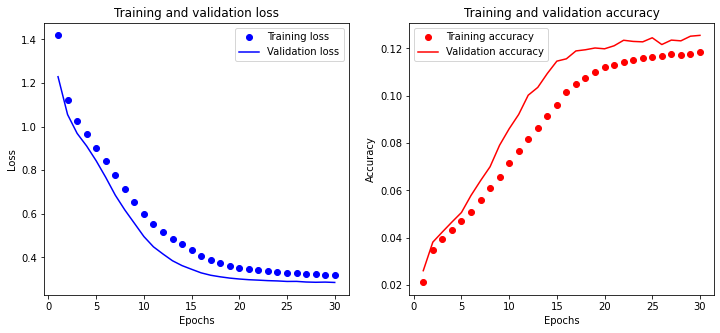

In [34]:
epochs = range(1, len(loss) + 1)

fig = plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, acc, 'ro', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()